In [1]:
import networkx as nx
from vparser import verilog_parser
from graphize import HeterDiG_GateWireNodePinEdge
from pathlib import Path
import os

retval = os.getcwd()
benchmark_repo = "TAU15"

#design_name = "c17"
#design_name = "simple"   
design_name = "s27"   

lib_name = "NangateOpenCellLibrary_typical"

file_name = f"{retval}/benchmarks/{benchmark_repo}/{design_name}/{design_name}.v"

path = Path(file_name)
io_flag = 1

module_name, inputs, outputs, wires, gates = verilog_parser(path,io_flag)
netlist = HeterDiG_GateWireNodePinEdge(io_flag=io_flag)
netlist.build(path, io_flag)
print("节点总数：" + str(len(netlist)))


节点总数：62


In [2]:
netlist.save("graph_data/" + design_name + "_raw")

已成功将图保存到 graph_data/s27_raw.gpickle 文件中。


In [3]:
netlist.load("graph_data/" + design_name + "_raw")

已成功从 graph_data/s27_raw.gpickle 中读取并加载类型为 <class 'networkx.classes.multidigraph.MultiDiGraph'> 的图。


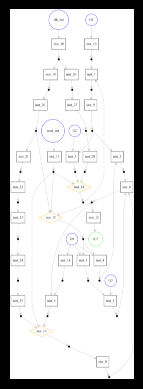

In [4]:
# 绘制网表的结构
# 当网表规模较大时不建议使用
netlist.draw()

In [5]:
print(netlist.is_cyclic())
print(len(netlist))
print(netlist.gates)
print(netlist.flipflops)
print(netlist.nsubtypes)
print(netlist.inputs)

True
62
['inst_19', 'inst_12', 'inst_8', 'inst_2', 'inst_1', 'inst_21', 'inst_25', 'inst_7', 'inst_20', 'inst_13', 'inst_27', 'inst_26', 'inst_0', 'inst_18', 'inst_24', 'inst_3', 'inst_6', 'inst_9', 'inst_5', 'inst_10', 'inst_4', 'inst_23', 'inst_11', 'inst_28', 'inst_22']
['inst_14', 'inst_15', 'inst_16']
['INV_X1', 'INV_X2', 'NOR3_X4', 'CLKBUF_X2', 'NOR2_X4', 'INV_X4', 'DFFR_X2', 'NAND2_X2', 'NOR2_X2']
['G1', 'reset_net', 'G3', 'clk_net', 'G2', 'G0']


In [6]:
print(netlist.get_edge_data('G2', 'inst_5'))
print(netlist.nodes["inst_14"])
print(netlist.filter_niotype("input",io_flag=io_flag))
print(netlist.edges["G2","inst_522",0])
# netlist.nodes["G2"]["attr"] = 1   # 可以为节点赋予新的特征

{0: {'type': 'fanin', 'subtype': 'A1'}}
{'type': 'flipflop', 'function': 'DFFR', 'spec': '2', 'subtype': 'DFFR_X2', 'fanin': {'RN': 'net_12', 'D': 'net_10', 'CK': 'net_27'}, 'fanout': {'QN': 'net_3'}}
['G1', 'reset_net', 'G3', 'clk_net', 'G2', 'G0']


KeyError: 'inst_522'